In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

rcParams = {
    'xtick.labelsize': 12,
    'axes.titlesize': 22,
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 12,
    'lines.linewidth': 2
}
sns.set_context("paper", font_scale=2, rc=rcParams)

<AxesSubplot:>

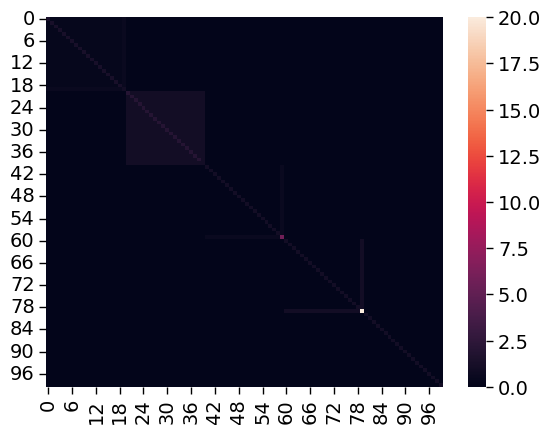

In [2]:
N = 100
covmat = np.load(f'/home/laouen.belloli/Documents/data/Oinfo/tt_hh/N-{N}_example_covmat.npy')
sns.heatmap(covmat)

In [3]:
def apparition_rate(nplets):
    return nplets.sum(axis=0)/nplets.shape[0]

best_solutions = []
best_oinfos = []

for step_size in [1, 2, 3, 4, 5]:

    best_solution = np.load(f'/home/laouen.belloli/Documents/git/Oinformation/benchmarking/results/simulated_annealing/simulated_annealing_multi_order_stepsize-{step_size}_best_solution.npy')
    best_oinfo = np.load(f'/home/laouen.belloli/Documents/git/Oinformation/benchmarking/results/simulated_annealing/simulated_annealing_multi_order_stepsize-{step_size}_best_oinfo.npy')
    
    best_solutions.append(best_solution)
    best_oinfos.append(best_oinfo)

rates = [
    apparition_rate(best_solution)
    for best_solution in best_solutions
]

rates = np.stack(rates)
best_oinfos = np.stack(best_oinfos)

In [7]:
n = N // 5

# sum the o info of the two synergistic sub-systems
measures_sub_systems = np.load('/home/laouen.belloli/Documents/git/Oinformation/benchmarking/results/simulated_annealing/measures_sub_systems.npy')
measures_sub_systems = measures_sub_systems.squeeze()
min_o = measures_sub_systems[2:4, 2].sum().item()
print('MIN O info:', min_o)

var_names = (
    [r'$TTw_{{y}}$'] + [rf'$TTw_{{x}}$' for i in range(n-1)] +
    [r'$TTs_{{y}}$'] + [rf'$TTs_{{x}}$' for i in range(n-1)] +
    [r'$HHw_{{y}}$'] + [rf'$HHw_{{x}}$' for i in range(n-1)] +
    [r'$HHs_{{y}}$'] + [rf'$HHs_{{x}}$' for i in range(n-1)] +
    [rf'$X_{i}$' for i in range(n)]
)

MIN O info: -6.30847828973025


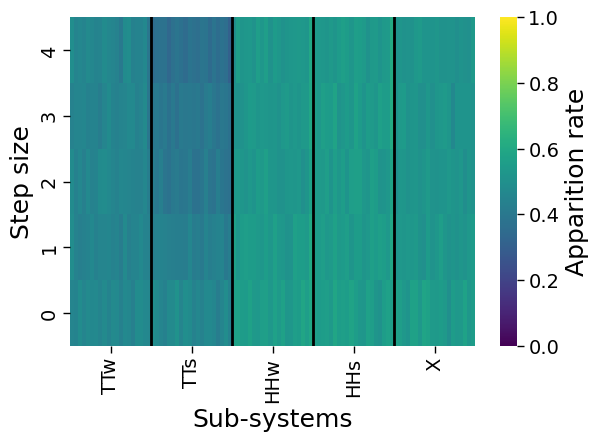

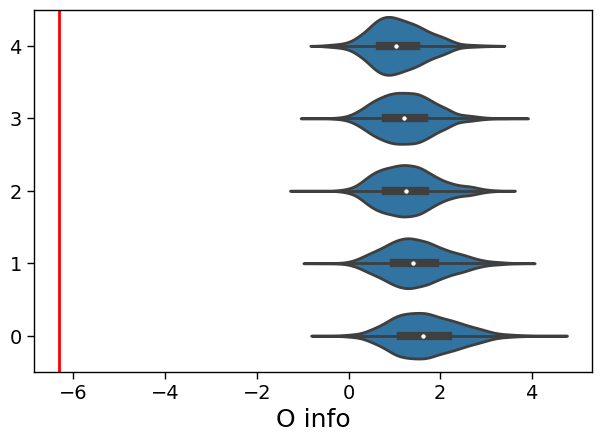

In [8]:
ax = sns.heatmap(rates, vmin=0, vmax=1, cmap='viridis')
ax.invert_yaxis()

# add vertical lines to separate the sub-systems at 0, 20, 40, 60, 80 and 100
for i in range(1, 5):
    ax.axvline(i*n, color='black')

# modify the x ticks to show the sub-systems
ax.set_xticks([i*n + n//2 for i in range(5)])
ax.set_xticklabels(['TTw', 'TTs', 'HHw', 'HHs', 'X'])

ax.set_ylabel('Step size')
ax.set_xlabel('Sub-systems')

# set colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label('Apparition rate')

plt.tight_layout()
plt.savefig(f'./figures/simulated_annealing/best_solutions.pdf', format='pdf')
plt.show()

# plot the o info distribution using a violin plot
df_oinfos = []
for step_size, oinfo in enumerate(best_oinfos):
    df = pd.DataFrame(oinfo, columns=['O info'])
    df['Step size'] = step_size
    df_oinfos.append(df)

df_oinfos = pd.concat(df_oinfos)

color = sns.color_palette()[0]
ax = sns.violinplot(
    data=df_oinfos,
    x='O info',
    y='Step size',
    color=color,
    order=[4, 3, 2, 1, 0],
    orient='h'
)

# print optimal O info (min O info)
ax.axvline(min_o, color='red')

ax.set_xlabel('O info')
ax.set_ylabel('')

plt.tight_layout()
plt.savefig(f'./figures/simulated_annealing/best_oinfos_dists.pdf', format='pdf')
plt.show()